COLORS: [[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.49019608e-01 3.84105749e-01 9.80634770e-01 1.00000000e+00]
 [1.96078431e-03 7.09281308e-01 9.23289106e-01 1.00000000e+00]
 [2.52941176e-01 9.25637660e-01 8.30184031e-01 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [7.54901961e-01 9.20905518e-01 5.52364973e-01 1.00000000e+00]
 [1.00000000e+00 7.00543038e-01 3.78411050e-01 1.00000000e+00]
 [1.00000000e+00 3.72701992e-01 1.89801093e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]

ID: 1



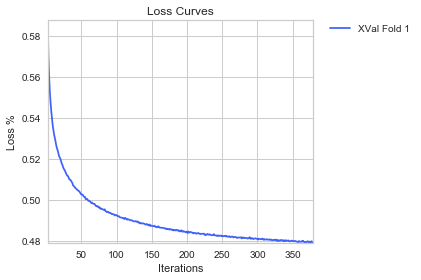

ID: 2



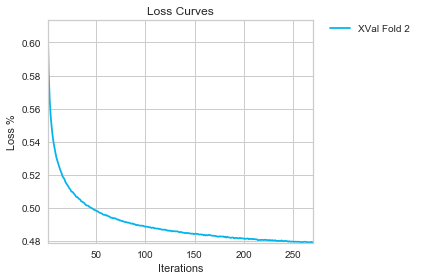

ID: 3



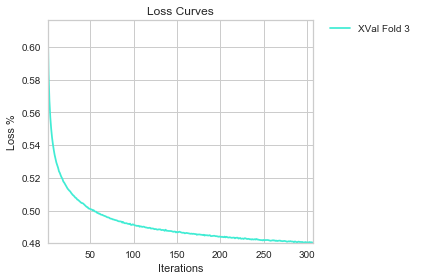

ID: 4



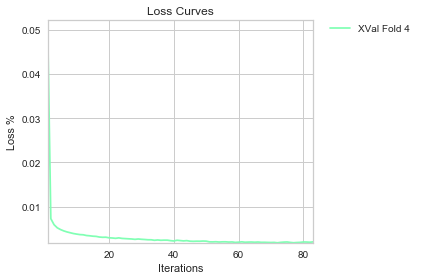

ID: 5



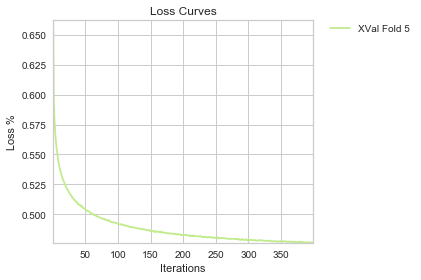

ID: 6



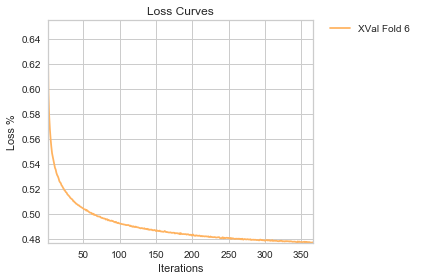

ID: 7



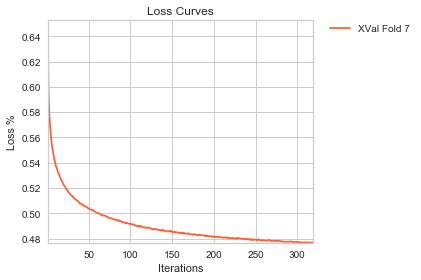

ID: 8



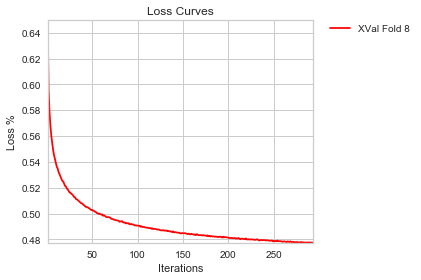

<Figure size 432x288 with 0 Axes>

In [8]:
from __future__ import absolute_import, division, print_function
from matplotlib.font_manager import _rebuild; _rebuild()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as spio
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
from yellowbrick.model_selection import LearningCurve
import random
import re
import string
import sys
import re
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np



# Define colors for each curve.
colors = cm.rainbow(np.linspace(0, 1, 9))
print("COLORS: {}\n".format(colors))

# Plot loss curve aka cost function for given fold.
def plot_loss_curve(id):
    # Initialize the figure
    plt.style.use('seaborn-bright')
    # create a color palette
    palette = plt.get_cmap('spring')
    # plot all folds
    plt.xlabel("Iterations")
    plt.ylabel("Loss %")
    plt.title("Loss Curves")
#     for id in range(1,9):
    plot_fold(id)
    # Save plot.
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
    plt.margins(0)
    plt.tight_layout()
    plt.show()
    plt.savefig("pooled_loss.png", dpi=600)

# Clean log file and split each cross-validation fold into its own file.
def plot_fold(id):
    print("ID: {}\n".format(id))
    filename = "cleaned/cleaned_pooled.txt_{}".format(id)
    headers = ['Epoch','Loss']
    df = pd.read_csv(filename, names=headers, skiprows=1)
    x = df['Epoch']
    y = df['Loss']
    plt.plot(x, y, label="XVal Fold {}".format(id), color=colors[id])
    plt.savefig("Pooled_Loss_Fold{}.png".format(id))
    
for i in range(1,9):
    plot_loss_curve(i)